# Please make a copy of this notebook and try solving the below questions in your notebook copy. Solutions for these will be discussed in the assignment review session on <day> post which, we will also share the solution notebook.


# **Good Luck**

# Handwritten Letters Dataset
###It contains the following info:
#####**The main dataset (letters.zip)**
1650 (50x33) color images (32x32x3) with 33 letters and the file with labels letters.txt.
Photo files are in the .png format and the labels are integers and values.
Additional letters.csv file.
The file LetterColorImages.h5 consists of preprocessing images of this set: image tensors and targets (labels).
#####**The additional dataset (letters2.zip)**
5940 (180x33) color images (32x32x3) with 33 letters and the file with labels letters2.txt.
Photo files are in the .png format and the labels are integers and values.
Additional letters2.csv file.
The file LetterColorImages2.h5 consists of preprocessing images of this set: image tensors and targets (labels).
#####**The additional dataset (letters3.zip)**
6600 (200x33) color images (32x32x3) with 33 letters and the file with labels letters2.txt.
Photo files are in the .png format and the labels are integers and values.
Additional letters3.csv file.
The file LetterColorImages3.h5 consists of preprocessing images of this set: image tensors and targets (labels).
Letter Symbols => Letter Labels
а=>1, б=>2, в=>3, г=>4, д=>5, е=>6, ё=>7, ж=>8, з=>9, и=>10,
й=>11, к=>12, л=>13, м=>14, н=>15, о=>16, п=>17, р=>18, с=>19, т=>20,
у=>21, ф=>22, х=>23, ц=>24, ч=>25, ш=>26, щ=>27, ъ=>28, ы=>29, ь=>30,
э=>31, ю=>32, я=>33

Image Backgrounds => Background Labels
striped=>0, gridded=>1, no background=>2, graph paper=>3

#####**The new version (zip_letters.zip)**
Letter Symbols => Letter Labels
а=>00, б=>01, в=>02, г=>03, д=>04, е=>05, ё=>06, ж=>07, з=>08, и=>09,
й=>10, к=>11, л=>12, м=>13, н=>14, о=>15, п=>16, р=>17, с=>18, т=>19,
у=>20, ф=>21, х=>22, ц=>23, ч=>24, ш=>25, щ=>26, ъ=>27, ы=>28, ь=>29,
э=>30, ю=>31, я=>32

'lowercase'=>00, 'uppercase'=>01

Image Backgrounds => Background Labels
'single-colored paper'=>00, 'striped paper'=>01, 'squared paper'=>02, 'graph paper'=>03



##Question 1
####Import the libraries and extract the dataset from zipped file.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.activations import relu,softmax,sigmoid
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

from tensorflow.keras.utils import to_categorical

In [2]:
def read_data(root,file):
    data = pd.read_csv(root+file)
    data["Source file"] = file[:-4]+'/'
    
    return data

In [3]:
root_folder = 'C:/Users/nswet/Documents/IK/Deeplearning_CV/Handwritten_Letter_Dataset/'
csv_files = ['letters.csv','letters2.csv','letters3.csv']
data_df = pd.DataFrame()

for csv_file in csv_files:
    data = read_data(root_folder,csv_file)
    data_df = pd.concat([data_df,data],axis=0,ignore_index = True)

In [4]:
del data

In [5]:
data_df.tail()

,letter,label,file,background,Source file
14185,я,33,33_426.png,3,letters3/
14186,я,33,33_427.png,3,letters3/
14187,я,33,33_428.png,3,letters3/
14188,я,33,33_429.png,3,letters3/
14189,я,33,33_430.png,3,letters3/


In [6]:
#lets get the unique set of letters from the data

unique_letters = ""

for i in range(len(data_df)):
    letter = data_df.iloc[i,0]
    
    if letter in unique_letters:
        pass
    else:
        unique_letters = unique_letters+letter

## Encode the letters and Background

In [7]:
unique_letters

'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'

In [8]:
def encode_letters(letter):
    
    encoded_ltr = np.zeros(len(unique_letters))
    
    get_index = unique_letters.index(letter)
    
    encoded_ltr[get_index] = 1
    
    return encoded_ltr

In [9]:
encode_letters('а')

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
# Meaning of background categories

# striped = 0 gridded = 1 no background = 2 graph paper = 3

def encode_background(background):
    encoded_bk = np.zeros(len(data_df["background"].unique()))
    
    encoded_bk[background] = 1
    
    return encoded_bk

In [11]:
encode_background(3)

array([0., 0., 0., 1.])

In [12]:
data_df["encoded_letters"] = data_df["letter"].apply(lambda x:encode_letters(x))
data_df["encoded_background"] = data_df["background"].apply(lambda x:encode_background(x))

In [13]:
data_df.head()

,letter,label,file,background,Source file,encoded_letters,encoded_background
0,а,1,01_01.png,0,letters/,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]"
1,а,1,01_02.png,0,letters/,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]"
2,а,1,01_03.png,0,letters/,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]"
3,а,1,01_04.png,0,letters/,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]"
4,а,1,01_05.png,0,letters/,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]"


In [14]:
# pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [15]:
import h5py

h5_file_path = root_folder +'LetterColorImages_123.h5'

with h5py.File(h5_file_path, 'r') as h5file:
    
    print("Keys", list(h5file.keys()))
    #Keys ['backgrounds', 'images', 'labels']
    
    background = h5file["backgrounds"][:]
    images = h5file["images"][:]
    labels = h5file["labels"][:]

Keys ['backgrounds', 'images', 'labels']


In [16]:
print("Summary of the data in LetterColorImages_123.h5")
print("+++++++++++++++++++++++++++++++++++++++++++++++")
print("length of the data", len(background))
print("Shape of the Images", images.shape)

Summary of the data in LetterColorImages_123.h5
+++++++++++++++++++++++++++++++++++++++++++++++
length of the data 14190
Shape of the Images (14190, 32, 32, 3)


> LetterColorImages_123.h5 file contains many image files 
> each image file is of size 32*32*3 and it has an associated label and background

In [17]:
print("Background Type:",type(background))
print("Images Type:",type(images))
print("Labels Type:",type(labels))

Background Type: <class 'numpy.ndarray'>
Images Type: <class 'numpy.ndarray'>
Labels Type: <class 'numpy.ndarray'>


## Encode the numpy array of the Background and Labels

In [18]:
## Normalise the images
X = images/255

In [19]:
from tensorflow.keras.utils import to_categorical
# labels are from 1 to 33
# subtract 1 from them to make them from 0 to 32
new_labels = labels-1
y = to_categorical(new_labels, num_classes=33)

In [20]:
print("X shape",X.shape)
print("y shape",y.shape)

X shape (14190, 32, 32, 3)
y shape (14190, 33)


In [21]:
## input dimensions
img_rows = X.shape[1]
img_cols = X.shape[2]
channels = X.shape[3]

input_dim = (img_rows,img_cols,channels)

## output dimensions
output_dim = y.shape[1]

## batch size
bacth_size = 64

## no of epochs
epochs = 15

In [22]:
def build_model():
    
    cnn_model = Sequential()
    
    #feature extraction
    
    #define conv layers with fileters and kernel size
    cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding="same",input_shape = input_dim))
    cnn_model.add(BatchNormalization())
    
    cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding="same"))
    cnn_model.add(BatchNormalization())
    
    cnn_model.add(Conv2D(filters=128,kernel_size=(4,4),activation='relu',padding="same"))
    cnn_model.add(BatchNormalization())
    
    #define maxpooling layers
    cnn_model.add(MaxPool2D(pool_size=(2, 2)))
                  
                  
    cnn_model.add(Flatten())     
                  
    #Classification
    cnn_model.add(Dense(units=128,activation='relu')) 
#     cnn_model.add(Dropout(0.25))
    cnn_model.add(BatchNormalization())
    cnn_model.add(Dense(units=output_dim,activation='softmax'))
    
    opt = Adam(learning_rate=0.001)
    loss = CategoricalCrossentropy()
    metrics = "accuracy"
    cnn_model.compile(loss = loss,optimizer = opt,metrics = metrics)
    
    return cnn_model

In [23]:
cnn_model = build_model()

In [24]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       131200    
                                                                 
 batch_normalization_2 (Bat  (None, 32, 32, 128)       5

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.20,stratify=y)

In [26]:
#### filepath="cnn_model_weights.best.hdf5"

#save model weights only for best model
filepath="cnn_model_weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# reduce the learning rate when a metrics has stopped learning
lr_scheduler =ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=1,factor=0.5,min_lr=1e-5)

# if the score doesnt improve during the 20 epocs stop the learning
early_stop = EarlyStopping(monitor='val_loss',patience=20,verbose=1,restore_best_weights=True)

callbacks_list = [checkpoint, lr_scheduler, early_stop]

# Fit the model
cnn_history = cnn_model.fit(X_train, y_train, validation_split=0.20, epochs=epochs, batch_size=bacth_size,callbacks=callbacks_list, verbose=1)

Epoch 1/20
142/142 [==============================] - ETA: 0s - loss: 2.6618 - accuracy: 0.2764
Epoch 1: val_loss improved from inf to 5.55199, saving model to cnn_model_weights.best.hdf5
142/142 [==============================] - 102s 708ms/step - loss: 2.6618 - accuracy: 0.2764 - val_loss: 5.5520 - val_accuracy: 0.0365 - lr: 0.0010
Epoch 2/20


C:\Users\nswet\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


142/142 [==============================] - ETA: 0s - loss: 1.3626 - accuracy: 0.6301
Epoch 2: val_loss improved from 5.55199 to 4.21865, saving model to cnn_model_weights.best.hdf5
142/142 [==============================] - 111s 785ms/step - loss: 1.3626 - accuracy: 0.6301 - val_loss: 4.2186 - val_accuracy: 0.0744 - lr: 0.0010
Epoch 3/20
142/142 [==============================] - ETA: 0s - loss: 0.7446 - accuracy: 0.8085
Epoch 3: val_loss improved from 4.21865 to 2.96519, saving model to cnn_model_weights.best.hdf5
142/142 [==============================] - 109s 768ms/step - loss: 0.7446 - accuracy: 0.8085 - val_loss: 2.9652 - val_accuracy: 0.2109 - lr: 0.0010
Epoch 4/20
142/142 [==============================] - ETA: 0s - loss: 0.4186 - accuracy: 0.8984
Epoch 4: val_loss improved from 2.96519 to 1.33158, saving model to cnn_model_weights.best.hdf5
142/142 [==============================] - 103s 728ms/step - loss: 0.4186 - accuracy: 0.8984 - val_loss: 1.3316 - val_accuracy: 0.6279 - lr

In [27]:
cnn_history.history

{'loss': [2.661795139312744,
  1.3625978231430054,
  0.7445661425590515,
  0.4186317026615143,
  0.190127894282341,
  0.07226427644491196,
  0.026434170082211494,
  0.011132021434605122,
  0.005930231884121895,
  0.004139701370149851,
  0.0030505552422255278,
  0.0024063163436949253,
  0.0019571336451917887,
  0.0016688663745298982,
  0.0013972261222079396,
  0.0012088583316653967,
  0.0010485982056707144,
  0.0009065253543667495,
  0.0008465125574730337,
  0.0007930999854579568],
 'accuracy': [0.2764012813568115,
  0.6301068067550659,
  0.8085012435913086,
  0.8983592391014099,
  0.9620085954666138,
  0.9911903738975525,
  0.9986785650253296,
  0.9997797608375549,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [5.551985263824463,
  4.218647003173828,
  2.965191602706909,
  1.3315800428390503,
  0.7812166810035706,
  0.9638316035270691,
  0.5745108127593994,
  0.4499458372592926,
  0.45870137214660645,
  0.4281814396381378,
  0.3970410

In [28]:
def display_image(images_list, list_of_labels = np.arange(9)):

    # plot first few images
    plt.figure(figsize=(12,12))
    for index in list_of_labels:

        # Get corresponding label
        ohe_label = encoded_labels[index]
        index_letter = list(ohe_label).index(1)
        associated_letter = letters[index_letter]

        # Get background
        associated_background = backgrounds[index]


        # define subplot
        plt.subplot(330 + 1 + index)
        plt.title('Label: %s \n'%associated_letter+\
                 'Background: %s\n'%associated_background,
                 fontsize=18)
        # plot raw pixel data
        plt.imshow(images[index])

#     plt.subplots_adjust(bottom = 0.001)  # the bottom of the subplots of the figure
#     plt.subplots_adjust(top = 0.99)
    # show the figure
    plt.show()

In [43]:
indx_img_to_display = list(range(30,300,30))
indx_img_to_display

[30, 60, 90, 120, 150, 180, 210, 240, 270]

In [45]:
#image
images[30].shape

#background
background[30]

#label
labels[30]

#letter
data_df.iloc[30,0]

(32, 32, 3)

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
def plot_images(indx_img_to_display,data_df,images,background,labels):
    
    fig = plt.figure(figsize=(12,15))
    
    for i in range(len(indx_img_to_display)):
        
        index_number = indx_img_to_display[i]
        #image
        img = images[index_number]

        #background
        bck = background[index_number]

        #label
        lbl = labels[index_number]

        #letter
        letter = data_df.iloc[index_number,:]["letter"]
        
        

        plt.subplot(3,3,i+1)
        plt.title(f"Letter:{letter} Background:{bck} label:{lbl}")
        plt.imshow(images[index_number].astype('uint8'))
        plt.suptitle("Actual Images and Labels")

    plt.show()

### Plotting Actual Images and labels and Backgrounds

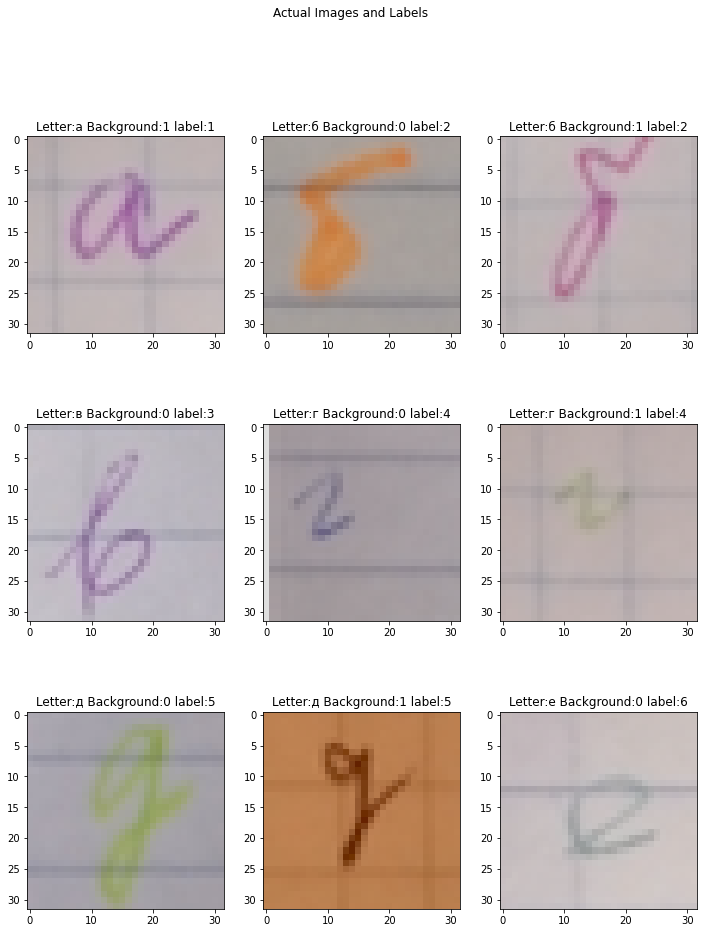

In [102]:
plot_images(indx_img_to_display,data_df,images,background,labels)

### Plotting tarin loss and validation loss

In [105]:
train_loss = cnn_history.history["loss"]
val_loss = cnn_history.history["val_loss"]

train_acc = cnn_history.history["accuracy"]
val_acc = cnn_history.history["val_accuracy"]

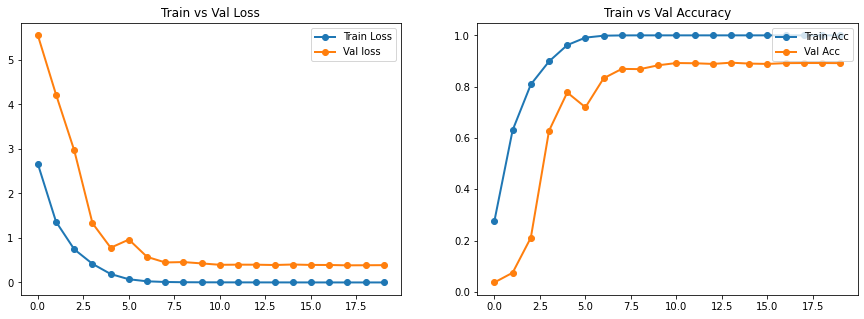

In [140]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(list(range(epochs)),train_loss,marker='o',linewidth=2)
plt.plot(list(range(epochs)),val_loss,marker='o',linewidth=2)
plt.title("Train vs Val Loss")
plt.legend(["Train Loss", "Val loss"],loc = 'upper right')

plt.subplot(1,2,2)
plt.plot(list(range(epochs)),train_acc,marker='o',linewidth=2)
plt.plot(list(range(epochs)),val_acc,marker='o',linewidth=2)
plt.title("Train vs Val Accuracy")
plt.legend(["Train Acc", "Val Acc"],loc = 'upper right')

plt.show()

### Model Predictions

In [180]:
# loading the model with the best validation accuracy
cnn_model.load_weights('cnn_model_weights.best.hdf5')

In [181]:
y_test_pred = cnn_model.predict(X_test)
cnn_model.evaluate(X_test, y_test_pred)

89/89 [==============================] - 4s 43ms/step - loss: 0.3191 - accuracy: 1.0000


[0.31911617517471313, 1.0]

In [182]:
cnn_model.evaluate(X_train, y_train)

355/355 [==============================] - 19s 54ms/step - loss: 0.0776 - accuracy: 0.9784


[0.07755503803491592, 0.9784178733825684]

In [183]:
cnn_model.evaluate(X_test, y_test)

89/89 [==============================] - 7s 72ms/step - loss: 0.3883 - accuracy: 0.8890


[0.3882833421230316, 0.8890063166618347]

In [149]:
import random

index = random.randint(0,len(data_df))

letter = data_df.iloc[index,:]["letter"]
label = data_df.iloc[index,:]["label"]
background = data_df.iloc[index,:]["background"]

In [166]:
img = images[index]/255

In [169]:
img.shape

(32, 32, 3)

In [170]:
y_pred_sample =cnn_model.predict(img.reshape(-1,img.shape[0],img.shape[1],img.shape[2]))

1/1 [==============================] - 0s 89ms/step


In [171]:
y_pred_sample

array([[6.6043678e-05, 2.3862543e-07, 9.3892468e-06, 3.7212649e-07,
        1.7961283e-06, 2.5008221e-06, 2.6550563e-07, 1.1942884e-06,
        7.4836866e-09, 3.5716530e-06, 8.0939162e-07, 2.5683834e-04,
        4.2519179e-07, 2.1660569e-06, 3.9453730e-06, 3.4371664e-05,
        7.6131341e-06, 1.1596202e-04, 6.9665848e-06, 5.7415051e-05,
        3.7084135e-08, 5.9245795e-05, 5.7964414e-08, 3.7615573e-06,
        1.6412008e-08, 3.9376504e-05, 4.2775027e-06, 5.7208422e-06,
        1.1460965e-05, 5.0995436e-07, 7.0616329e-07, 9.9930251e-01,
        3.6185773e-07]], dtype=float32)

In [175]:
y_pred_label = np.argmax(y_pred_sample)

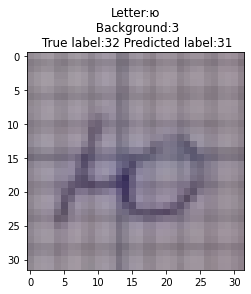

In [178]:
plt.imshow(images[index].astype('uint8'))
plt.title(f"Letter:{letter}\n Background:{background}\n True label:{label} Predicted label:{y_pred_label}")
plt.show()